## Imports

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm as _pltcolormap
from matplotlib import colors as _pltcolors
import numpy as np
import pandas as pd
import sys
import pathlib
import os

## Testing Background Removal

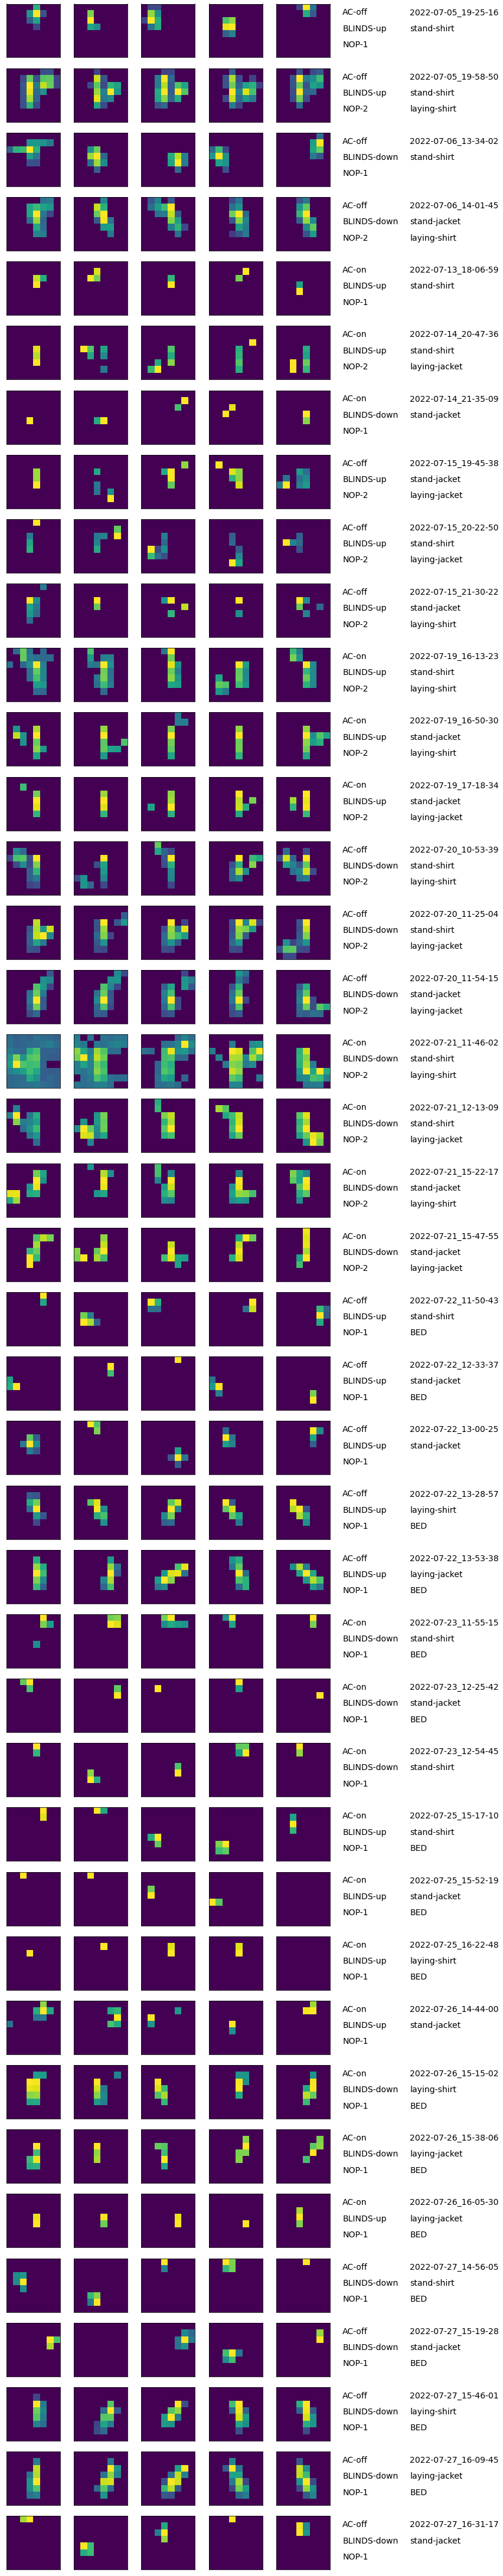

In [58]:
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"

col_num = 7
row_num = 40
    
fig, axs = plt.subplots(row_num, col_num, figsize=(col_num * 2, row_num * 2))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

i = 0
j = 0

T = 0.75
T_ac = 2.25

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-1' in path.name) or ('NOP-2' in path.name):
            ac = "---"
            blinds = "---"
            if 'AC-on' in path.name:
                ac = 'AC-on'
            else: ac = 'AC-off'
            if 'BLINDS-up' in path.name:
                blinds = 'BLINDS-up'
            else: blinds = 'BLINDS-down'
            for path2 in pathlib.Path().cwd().iterdir():
                if path2.is_dir():
                    if ("NOP-0" in path2.name) and (path2.name != path.name) and (ac in path2.name) and (blinds in path2.name) and ("BED" not in path2.name):
                        #path2 is a background with no bed, use accordingly
                        raw_df = pd.read_csv(path / "EYE_old.csv")
                        bg_df = pd.read_csv(path2 / "EYE_old.csv")
                        bg_mean = bg_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1).mean()
                        raw_df_nolabels = raw_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
                        
                        for o,p in zip(range(5), [5,40,75,110,130]):
                            diff = (raw_df_nolabels.iloc[p] - bg_mean).values.reshape(8,8)
                            bg_removed = np.where(diff > T, diff, 0) if ac == 'AC-off' else np.where(diff > T_ac, diff, 0) 
                            axs[i,o].imshow(bg_removed)
                        axs[i,5].set_frame_on(False)
                        axs[i,5].text(0, 0.8, ac, fontsize=14)
                        axs[i,5].text(0, 0.5, blinds, fontsize=14)
                        axs[i,5].text(0, 0.2, "NOP-"+path.name[path.name.find('NOP-')+len('NOP-')], fontsize=14)
                        axs[i,6].set_frame_on(False)
                        axs[i,6].text(0, 0.8, path.name.split("__")[0], fontsize=14)
                        axs[i,6].text(0, 0.5, path.name.split("__")[4], fontsize=14)
                        if (len(path.name.split("__")) >= 6):
                            axs[i,6].text(0, 0.2, path.name.split("__")[5], fontsize=14)
            i += 1        
os.chdir(prev_cwd)

In [3]:
for o,p in zip(range(5), [5,40,75,110,130]):
    print(o,p)

0 5
1 40
2 75
3 110
4 130


In [11]:
print(pathlib.Path.cwd())
cond_list = []
prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)
for path in pathlib.Path().cwd().iterdir():
    if "NOP" in path.name:
        cond = path.name[21:]
        if cond not in cond_list:
            cond_list += [cond]
            print( path.name.split("__"))
        else:
            print(path.name)
os.chdir(prev_cwd)
len(cond_list)

D:\Code\LDiCS
['2022-07-05_17-59-26', 'AC-off', 'BLINDS-up', 'NOP-0']
['2022-07-05_19-25-16', 'AC-off', 'BLINDS-up', 'NOP-1', 'stand-shirt']
['2022-07-05_19-58-50', 'AC-off', 'BLINDS-up', 'NOP-2', 'stand-shirt', 'laying-shirt', 'BED']
['2022-07-06_13-04-50', 'AC-off', 'BLINDS-down', 'NOP-0']
['2022-07-06_13-34-02', 'AC-off', 'BLINDS-down', 'NOP-1', 'stand-shirt']
['2022-07-06_14-01-45', 'AC-off', 'BLINDS-down', 'NOP-2', 'stand-jacket', 'laying-shirt', 'BED']
['2022-07-13_17-42-55', 'AC-on', 'BLINDS-up', 'NOP-0']
['2022-07-13_18-06-59', 'AC-on', 'BLINDS-up', 'NOP-1', 'stand-shirt']
['2022-07-13_19-12-30', 'AC-on', 'BLINDS-up', 'NOP-0', 'BED']
['2022-07-14_19-44-49', 'AC-on', 'BLINDS-down', 'NOP-0']
['2022-07-14_20-47-36', 'AC-on', 'BLINDS-up', 'NOP-2', 'stand-shirt', 'laying-jacket', 'BED']
['2022-07-14_21-35-09', 'AC-on', 'BLINDS-down', 'NOP-1', 'stand-jacket']
['2022-07-15_19-45-38', 'AC-off', 'BLINDS-up', 'NOP-2', 'stand-jacket', 'laying-jacket', 'BED']
['2022-07-15_20-22-50', 'AC-of

48

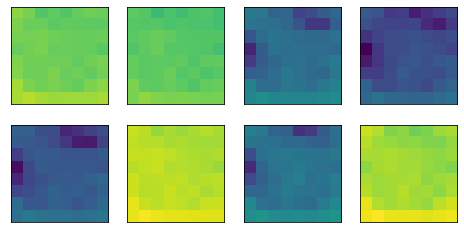

In [25]:
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"


fig, axs = plt.subplots(2, 4, figsize=(4 * 2, 2 * 2))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)

i = 0

for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-0' in path.name):
            bg_df = pd.read_csv(path / "EYE_old.csv").drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
            axs[i // 4, i % 4].imshow(bg_df.mean().values.reshape(8,8), vmin = 14.49, vmax = 26.1)
            i += 1
os.chdir(prev_cwd)

14.492146596858639
26.064039408866996


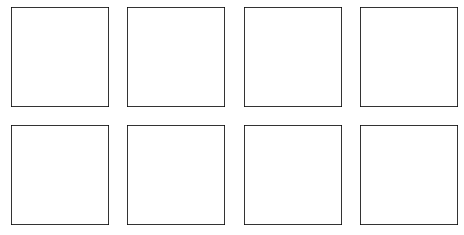

In [22]:
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"


fig, axs = plt.subplots(2, 4, figsize=(4 * 2, 2 * 2))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)

i = 0
mins = []
maxs = []
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-0' in path.name):
            bg_df = pd.read_csv(path / "EYE_old.csv").drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
            #axs[i // 4, i % 4].imshow(bg_df.mean().values.reshape(8,8))
            #i += 1
            mins += [min(bg_df.mean().values)]
            maxs += [max(bg_df.mean().values)]
os.chdir(prev_cwd)
print(min(mins))
print(max(maxs))

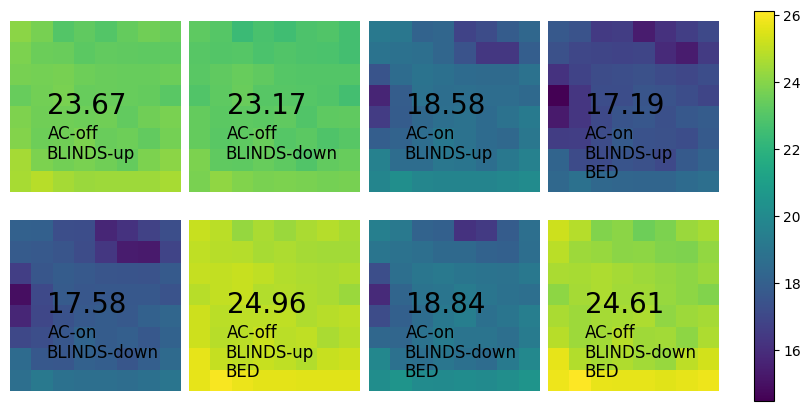

In [98]:
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"


fig, axs = plt.subplots(2, 4, figsize=(4 * 2, 2 * 2),constrained_layout=True)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)

i = 0
im = None
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-0' in path.name):
            bg_df = pd.read_csv(path / "EYE_old.csv").drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
            axs[i // 4, i % 4].set_frame_on(False)
            im = axs[i // 4, i % 4].imshow(bg_df.mean().values.reshape(8,8), vmin = 14.49, vmax = 26.1)
            axs[i // 4, i % 4].text(1.25, 3.8, round(bg_df.mean().mean(),2), fontsize=20)
            axs[i // 4, i % 4].text(1.25, 5, path.name.split("__")[1], fontsize=12)
            axs[i // 4, i % 4].text(1.2, 5.9, path.name.split("__")[2], fontsize=12)
            if ("BED" in path.name):
                axs[i // 4, i % 4].text(1.2, 6.8, "BED", fontsize=12)
            i += 1
fig.colorbar(im, ax = axs)
os.chdir(prev_cwd)

TZ_0     0.528754
TZ_1     0.269178
TZ_2    -0.555993
TZ_3    -0.364657
TZ_4    -1.359436
           ...   
TZ_59    1.043496
TZ_60    1.064840
TZ_61    1.012072
TZ_62    1.123790
TZ_63    1.280269
Length: 64, dtype: float64

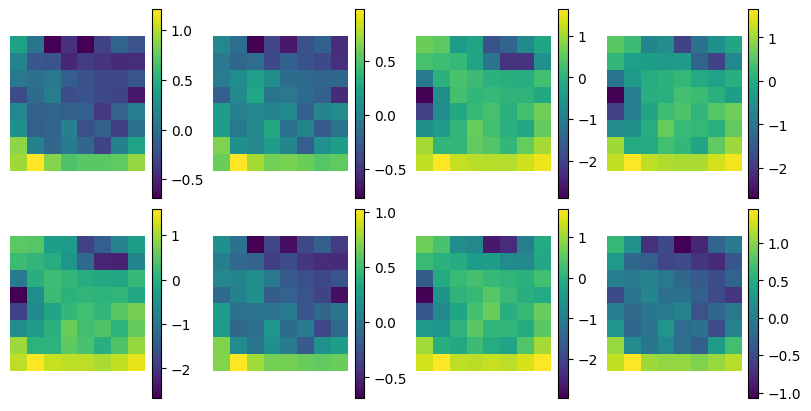

In [17]:
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"


fig, axs = plt.subplots(2, 4, figsize=(4 * 2, 2 * 2),constrained_layout=True)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)

i = 0
im = None
a = np.empty(64)
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-0' in path.name):
            bg_df = pd.read_csv(path / "EYE_old.csv").drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
            axs[i // 4, i % 4].set_frame_on(False)
            im = axs[i // 4, i % 4].imshow((bg_df.mean() - bg_df.mean().mean()).values.reshape(8,8))
            #axs[i // 4, i % 4].text(1.25, 3.8, round(bg_df.mean().mean(),2), fontsize=20)
            fig.colorbar(im, ax=axs[i // 4, i % 4])
            i += 1
            a += (bg_df.mean() - bg_df.mean().mean())
#fig.colorbar(im, ax = axs)
os.chdir(prev_cwd)
a/8

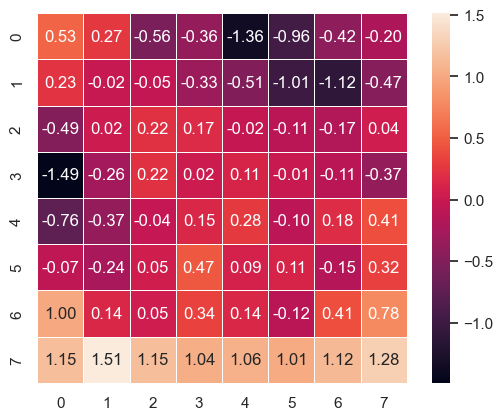

In [18]:
import seaborn as sns
sns.set()
sns.heatmap((a/8).values.reshape(8,8), annot=True, fmt=".2f", linewidths=.5,square=True)
#plt.imshow((a/8).values.reshape(8,8), )
AVG = a/8


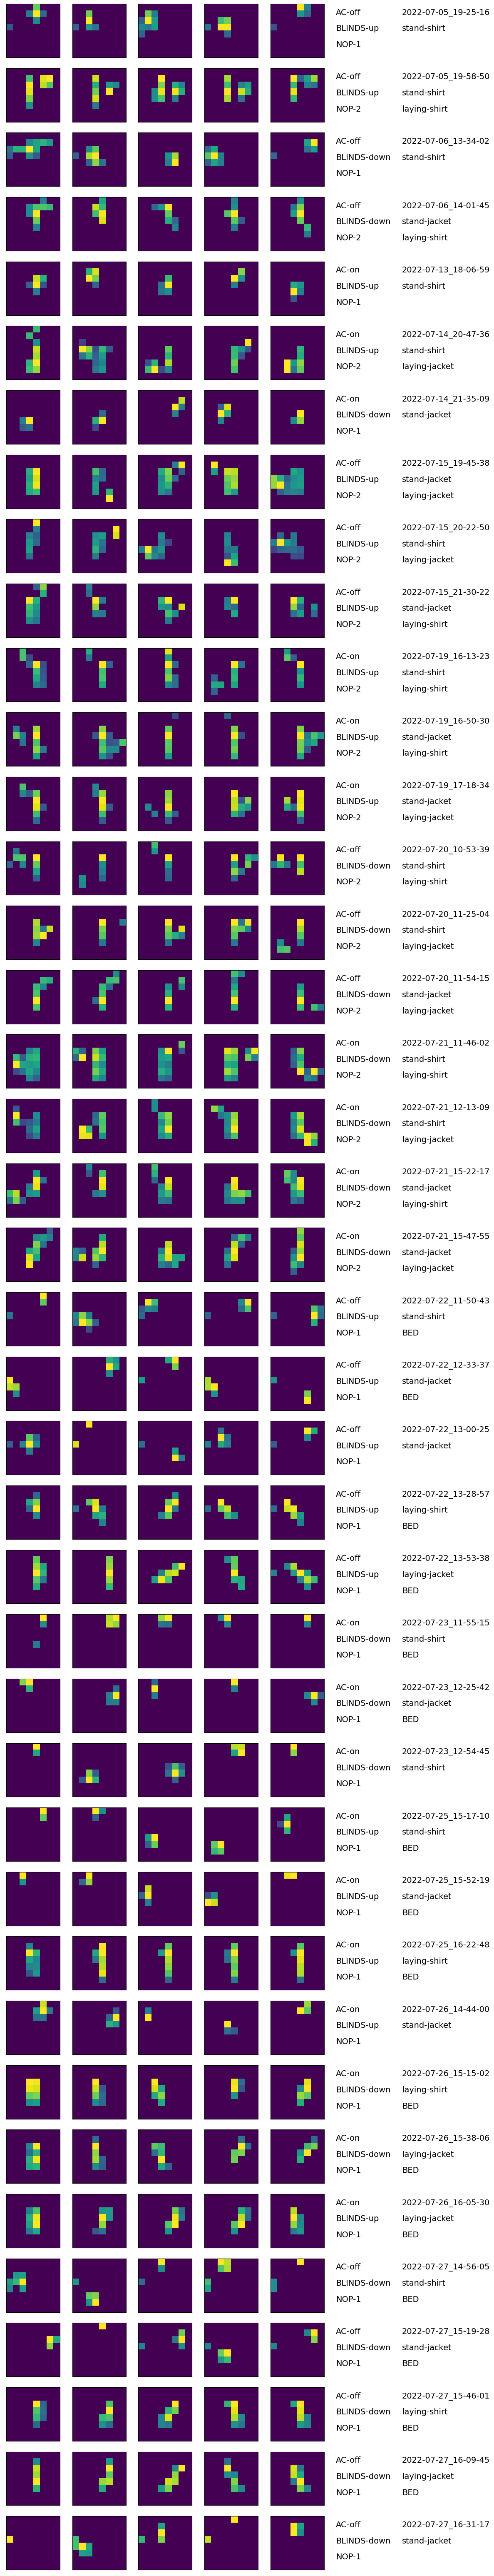

In [19]:
matplotlib.rc_file_defaults()
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"

col_num = 7
row_num = 40
    
fig, axs = plt.subplots(row_num, col_num, figsize=(col_num * 2, row_num * 2))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

i = 0
j = 0

T = 1
T_ac = 1

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-1' in path.name) or ('NOP-2' in path.name):
            ac = "---"
            blinds = "---"
            if 'AC-on' in path.name:
                ac = 'AC-on'
            else: ac = 'AC-off'
            if 'BLINDS-up' in path.name:
                blinds = 'BLINDS-up'
            else: blinds = 'BLINDS-down'
            for path2 in pathlib.Path().cwd().iterdir():
                if path2.is_dir():
                    if ("NOP-0" in path2.name) and (path2.name != path.name) and (ac in path2.name) and (blinds in path2.name) and ("BED" not in path2.name):
                        #path2 is a background with no bed, use accordingly
                        raw_df = pd.read_csv(path / "EYE_old.csv")
                        bg_df = pd.read_csv(path2 / "EYE_old.csv")
                        bg_mean = bg_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1).mean()
                        raw_df_nolabels = raw_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
                        
                        for o,p in zip(range(5), [5,40,75,110,130]):
                            diff = (raw_df_nolabels.iloc[p] - (raw_df_nolabels.mean().mean() + AVG)).values.reshape(8,8)
                            bg_removed = np.where(diff > T, diff, 0) if ac == 'AC-off' else np.where(diff > T_ac, diff, 0) 
                            axs[i,o].imshow(bg_removed)
                        axs[i,5].set_frame_on(False)
                        axs[i,5].text(0, 0.8, ac, fontsize=14)
                        axs[i,5].text(0, 0.5, blinds, fontsize=14)
                        axs[i,5].text(0, 0.2, "NOP-"+path.name[path.name.find('NOP-')+len('NOP-')], fontsize=14)
                        axs[i,6].set_frame_on(False)
                        axs[i,6].text(0, 0.8, path.name.split("__")[0], fontsize=14)
                        axs[i,6].text(0, 0.5, path.name.split("__")[4], fontsize=14)
                        if (len(path.name.split("__")) >= 6):
                            axs[i,6].text(0, 0.2, path.name.split("__")[5], fontsize=14)
            i += 1        
os.chdir(prev_cwd)

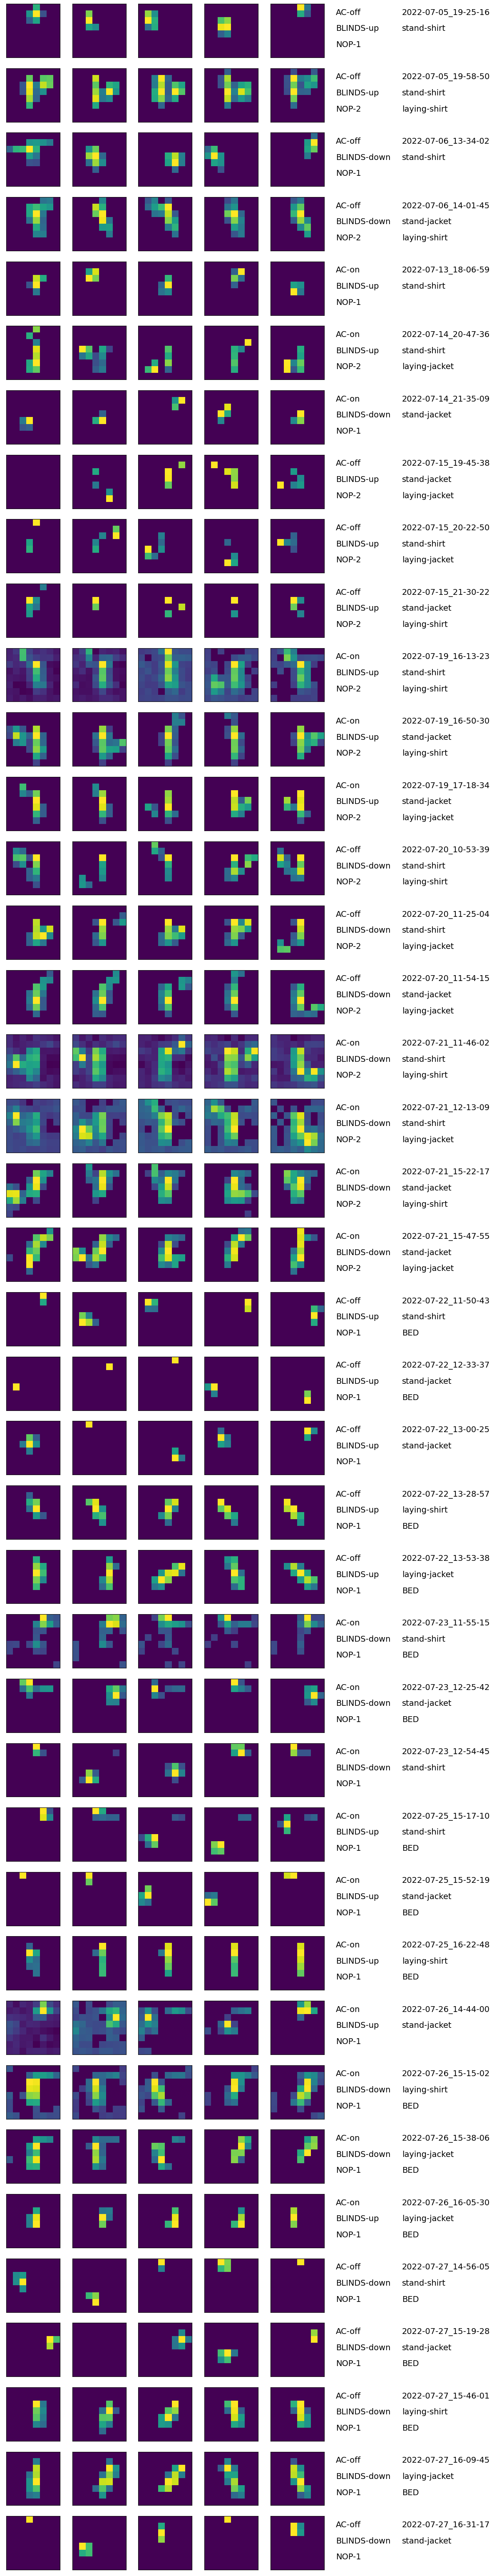

In [100]:
matplotlib.rc_file_defaults()
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"

col_num = 7
row_num = 40
    
fig, axs = plt.subplots(row_num, col_num, figsize=(col_num * 2, row_num * 2))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

i = 0
j = 0

T = 0.95
T_ac = 0.95

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-1' in path.name) or ('NOP-2' in path.name):
            ac = "---"
            blinds = "---"
            if 'AC-on' in path.name:
                ac = 'AC-on'
            else: ac = 'AC-off'
            if 'BLINDS-up' in path.name:
                blinds = 'BLINDS-up'
            else: blinds = 'BLINDS-down'
            for path2 in pathlib.Path().cwd().iterdir():
                if path2.is_dir():
                    if ("NOP-0" in path2.name) and (path2.name != path.name) and (ac in path2.name) and (blinds in path2.name) and ("BED" not in path2.name):
                        #path2 is a background with no bed, use accordingly
                        raw_df = pd.read_csv(path / "EYE_old.csv")
                        bg_df = pd.read_csv(path2 / "EYE_old.csv")
                        bg_mean = bg_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1).mean()
                        raw_df_nolabels = raw_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
                        
                        for o,p in zip(range(5), [5,40,75,110,130]):
                            diff = (raw_df_nolabels.iloc[p] - bg_mean).values.reshape(8,8)
                            bg_removed = np.where(diff > T, diff, 0) if ac == 'AC-off' else np.where(diff > T_ac, diff, 0) 
                            axs[i,o].imshow(bg_removed)
                        axs[i,5].set_frame_on(False)
                        axs[i,5].text(0, 0.8, ac, fontsize=14)
                        axs[i,5].text(0, 0.5, blinds, fontsize=14)
                        axs[i,5].text(0, 0.2, "NOP-"+path.name[path.name.find('NOP-')+len('NOP-')], fontsize=14)
                        axs[i,6].set_frame_on(False)
                        axs[i,6].text(0, 0.8, path.name.split("__")[0], fontsize=14)
                        axs[i,6].text(0, 0.5, path.name.split("__")[4], fontsize=14)
                        if (len(path.name.split("__")) >= 6):
                            axs[i,6].text(0, 0.2, path.name.split("__")[5], fontsize=14)
            i += 1        
os.chdir(prev_cwd)

In [5]:
import math

24.214285714285715
24.214285714285715
23.285714285714285
23.642857142857142
18.142857142857142
17.785714285714285
17.285714285714285
21.642857142857142
21.857142857142858
22.285714285714285
21.5
19.142857142857142
18.142857142857142
23.285714285714285
23.214285714285715
23.285714285714285
20.285714285714285
19.5
18.142857142857142
18.142857142857142
22.642857142857142
23.07142857142857
23.07142857142857
23.285714285714285
23.642857142857142
18.5
18.0
17.142857142857142
18.5
18.0
17.5
20.0
18.142857142857142
17.785714285714285
17.142857142857142
22.642857142857142
22.714285714285715
22.857142857142858
23.214285714285715
23.214285714285715


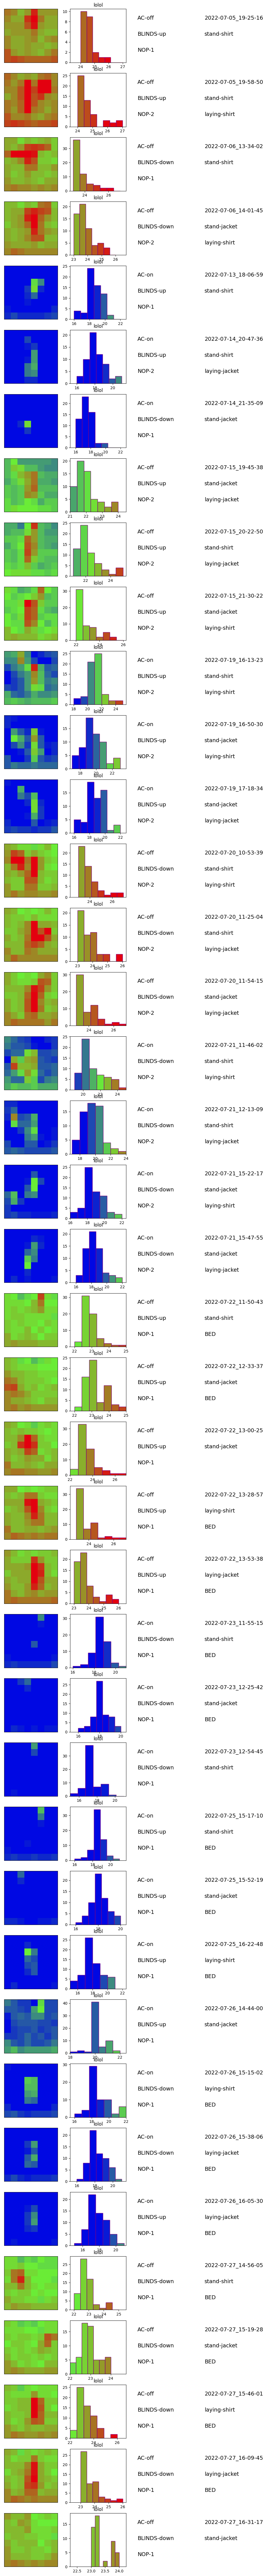

In [64]:
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"

col_num = 4
row_num = 40
    
fig, axs = plt.subplots(row_num, col_num, figsize=(col_num * 3, row_num * 3))
#plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

i = 0
j = 0

T = 1
T_ac = 1

colormap = _pltcolors.LinearSegmentedColormap.from_list(
    "", ['#0008e3', '#6aed37', '#e3000f'])
norm = _pltcolors.Normalize(
    vmin=19, vmax=26, clip=True)

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        ac = "---"
        blinds = "---"
        if 'AC-on' in path.name:
            ac = 'AC-on'
        else: ac = 'AC-off'
        if 'BLINDS-up' in path.name:
            blinds = 'BLINDS-up'
        else: blinds = 'BLINDS-down'
        if ('NOP-1' in path.name) or ('NOP-2' in path.name):
            raw_df = pd.read_csv(path / "EYE_old.csv")
            raw_df_nolabels = raw_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
            
            vals = raw_df_nolabels.iloc[5].values
            
            axs[i,0].set_xticks([]) 
            axs[i,0].set_yticks([]) 
            axs[i,0].imshow(vals.reshape(8,8), cmap = colormap, norm = norm)
            bins = np.linspace(math.ceil(min(vals)), 
                   math.floor(max(vals)),
                   8) # fixed number of bins
            #axs[i,1].set
            axs[i,1].set_xlim([min(vals), max(vals)])
            _, bins, patches = axs[i,1].hist(vals, bins=bins, alpha=1)
            for k, p in enumerate(patches):
                #print(p.get_x())
                p.set_color(colormap(norm(p.get_x() + p.get_width())))
            
            hist, bin_edges = np.histogram(vals, bins = np.linspace(math.ceil(min(vals)), math.floor(max(vals)), 8))
            bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
            axs[i,1].bar(bin_edges[:-1], hist, width=np.diff(bin_edges), align='edge', edgecolor='purple',linewidth=1,color=(0.0, 0.0, 0.0, 0.0))
            print(bin_centers[np.argmax(hist)])
            axs[i,1].set_title("lolol")
            #bin_centers = 0.5*(bins[:-1]+bins[1:])
            #maxi = np.abs(bin_centers).max()
           # norm = plt.Normalize(-maxi,maxi)

            #for c, p in zip(bin_centers, patches):
            #    plt.setp(p, "facecolor", cm(norm(c)))
            
            
            axs[i,2].set_frame_on(False)
            axs[i,2].set_xticks([]) 
            axs[i,2].set_yticks([]) 
            axs[i,2].text(0, 0.8, ac, fontsize=14)
            axs[i,2].text(0, 0.5, blinds, fontsize=14)
            axs[i,2].text(0, 0.2, "NOP-"+path.name[path.name.find('NOP-')+len('NOP-')], fontsize=14)
            axs[i,3].set_frame_on(False)
            axs[i,3].set_xticks([]) 
            axs[i,3].set_yticks([]) 
            axs[i,3].text(0, 0.8, path.name.split("__")[0], fontsize=14)
            axs[i,3].text(0, 0.5, path.name.split("__")[4], fontsize=14)
            if (len(path.name.split("__")) >= 6):
                axs[i,3].text(0, 0.2, path.name.split("__")[5], fontsize=14)
            i += 1   
os.chdir(prev_cwd)

Text(1.25, 3.8, '22.91')

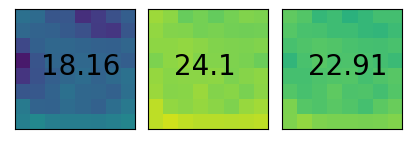

In [35]:
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"


fig, axs = plt.subplots(1, 3, figsize=(1 * 4, 3 * 4),constrained_layout=True)
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)

AC_on_bg = np.empty(64)
AC_off_bg = np.empty(64)

i = 0
im = None
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-0' in path.name):
            bg_df = pd.read_csv(path / "EYE_old.csv").drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)
            #axs[i // 4, i % 4].set_frame_on(False)
            #im = axs[i // 4, i % 4].imshow(bg_df.mean().values.reshape(8,8), vmin = 14.49, vmax = 26.1)
            #axs[i // 4, i % 4].text(1.25, 3.8, round(bg_df.mean().mean(),2), fontsize=20)
            #axs[i // 4, i % 4].text(1.25, 5, path.name.split("__")[1], fontsize=12)
            #axs[i // 4, i % 4].text(1.2, 5.9, path.name.split("__")[2], fontsize=12)
            #if ("BED" in path.name):
            #    axs[i // 4, i % 4].text(1.2, 6.8, "BED", fontsize=12)
            #i += 1
            if ('AC-on' in path.name):
                AC_on_bg += bg_df.mean()
            else:
                AC_off_bg += bg_df.mean()
AC_on_bg /= 4
AC_off_bg /= 4
im = axs[0].imshow(AC_on_bg.values.reshape(8,8), vmin = 14.49, vmax = 26.1)
axs[0].text(1.25, 3.8, round(AC_on_bg.mean(),2), fontsize=20)
im = axs[1].imshow(AC_off_bg.values.reshape(8,8), vmin = 14.49, vmax = 26.1)
axs[1].text(1.25, 3.8, round(AC_off_bg.mean(),2), fontsize=20)
im = axs[2].imshow((AC_off_bg*0.8 + AC_on_bg*0.2).values.reshape(8,8), vmin = 14.49, vmax = 26.1)
axs[2].text(1.25, 3.8, round((AC_off_bg*0.8 + AC_on_bg*0.2).mean(),2), fontsize=20)
                

#os.chdir(prev_cwd)

24.214285714285715 1.018857692775232 24.2142857142857
23.857142857142858 0.9587464729285263 23.85714285714285
23.285714285714285 0.862568521173797 23.28571428571426
24.214285714285715 1.018857692775232 24.2142857142857
23.642857142857142 0.9226797410205028 23.64285714285714
24.214285714285715 1.018857692775232 24.2142857142857
24.214285714285715 1.018857692775232 24.2142857142857
24.214285714285715 1.018857692775232 24.2142857142857
24.214285714285715 1.018857692775232 24.2142857142857
24.214285714285715 1.018857692775232 24.2142857142857
23.285714285714285 0.862568521173797 23.28571428571426
23.285714285714285 0.862568521173797 23.28571428571426
23.642857142857142 0.9226797410205028 23.64285714285714
23.285714285714285 0.862568521173797 23.28571428571426
23.42857142857143 0.8866130091124798 23.42857142857142
23.642857142857142 0.9226797410205028 23.64285714285714
23.642857142857142 0.9226797410205028 23.64285714285714
23.642857142857142 0.9226797410205028 23.64285714285714
23.28571428

20.0 0.3095452985841054 19.999999999999996
19.785714285714285 0.27347856667608184 19.78571428571428
19.07142857142857 0.1532561269826704 19.071428571428562
19.142857142857142 0.16527837095201178 19.142857142857135
19.0 0.14123388301332962 18.999999999999993
18.142857142857142 -0.003033044618763974 18.142857142857128
18.5 0.057078175227941744 18.49999999999999
18.142857142857142 -0.003033044618763974 18.142857142857128
18.142857142857142 -0.003033044618763974 18.142857142857128
18.142857142857142 -0.003033044618763974 18.142857142857128
17.785714285714285 -0.0631442644654697 17.785714285714267
17.785714285714285 -0.0631442644654697 17.785714285714267
17.785714285714285 -0.0631442644654697 17.785714285714267
17.142857142857142 -0.17134446018953975 17.142857142857135
17.142857142857142 -0.17134446018953975 17.142857142857135
17.142857142857142 -0.17134446018953975 17.142857142857135
17.142857142857142 -0.17134446018953975 17.142857142857135
17.142857142857142 -0.17134446018953975 17.14285

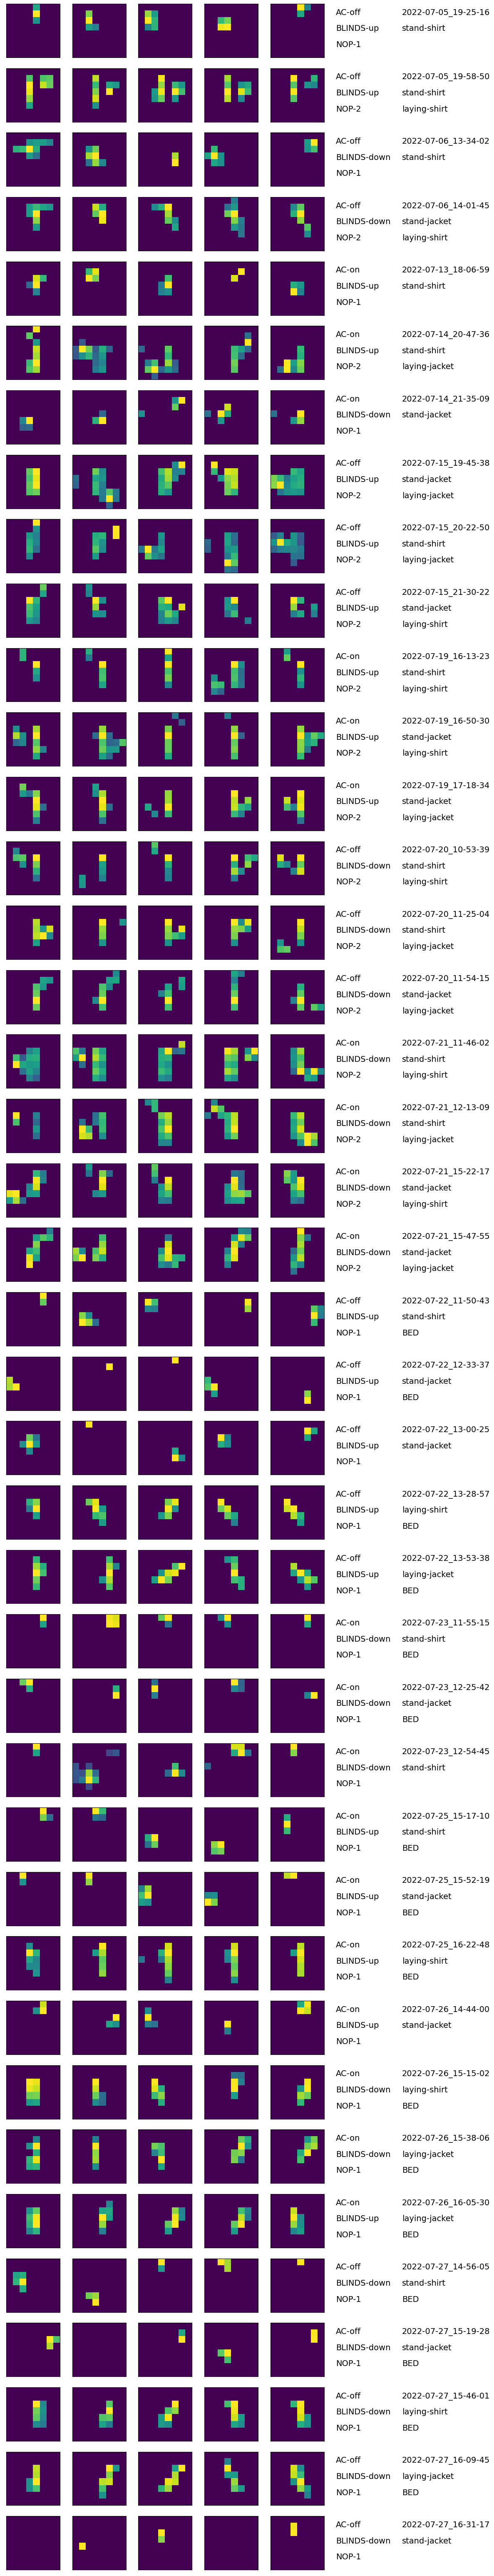

In [63]:
matplotlib.rc_file_defaults()
rootdir = r"D:\Code\LDiCS\G06_Hospital\40_Realisation\00_Recorded_Sensor_Data"

col_num = 7
row_num = 40
    
fig, axs = plt.subplots(row_num, col_num, figsize=(col_num * 2, row_num * 2))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

i = 0
j = 0
T = 1.5

differ = AC_off_bg.mean() - AC_on_bg.mean()

prev_cwd = pathlib.Path.cwd()
os.chdir(rootdir)
for path in pathlib.Path().cwd().iterdir():
    if path.is_dir():
        if ('NOP-1' in path.name) or ('NOP-2' in path.name):
            ac = "---"
            blinds = "---"
            if 'AC-on' in path.name:
                ac = 'AC-on'
            else: ac = 'AC-off'
            if 'BLINDS-up' in path.name:
                blinds = 'BLINDS-up'
            else: blinds = 'BLINDS-down'
                
                
            raw_df = pd.read_csv(path / "EYE_old.csv")
            #bg_mean = bg_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1).mean()

            raw_df_nolabels = raw_df.drop(['received_time', 'NOP', 'bed_present', 'bed_occupied'], axis=1)


            for o,p in zip(range(5), [5,40,75,110,130]):
                vals = raw_df_nolabels.iloc[p].values

                hist, bin_edges = np.histogram(vals, bins = np.linspace(math.ceil(min(vals)), math.floor(max(vals)), 8))
                bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
                AVG = bin_centers[np.argmax(hist)]
                k = ((AVG - AC_on_bg.mean()) / differ)
                print(AVG,k, (AC_off_bg*k + AC_on_bg*(1-k)).mean())
                fake_bg = (AC_off_bg*k + AC_on_bg*(1-k))
                (AC_off_bg*k + AC_on_bg*(k-1)).values.reshape(8,8)
                
                
                diff = (raw_df_nolabels.iloc[p] - fake_bg).values.reshape(8,8)
                bg_removed = np.where(diff > T, diff, 0) #if ac == 'AC-off' else np.where(diff > T_ac, diff, 0) 
                axs[i,o].imshow(bg_removed.reshape(8,8))
            axs[i,5].set_frame_on(False)
            axs[i,5].text(0, 0.8, ac, fontsize=14)
            axs[i,5].text(0, 0.5, blinds, fontsize=14)
            axs[i,5].text(0, 0.2, "NOP-"+path.name[path.name.find('NOP-')+len('NOP-')], fontsize=14)
            axs[i,6].set_frame_on(False)
            axs[i,6].text(0, 0.8, path.name.split("__")[0], fontsize=14)
            axs[i,6].text(0, 0.5, path.name.split("__")[4], fontsize=14)
            if (len(path.name.split("__")) >= 6):
                axs[i,6].text(0, 0.2, path.name.split("__")[5], fontsize=14)
            i += 1        
os.chdir(prev_cwd)